In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = preprocessing.LabelEncoder()
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
df = pd.read_csv('wine.csv')

In [67]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

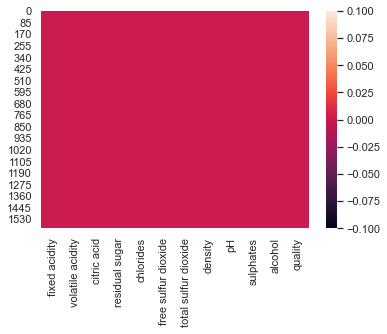

In [69]:
sns.heatmap(df.isnull(), data = df)

In [70]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

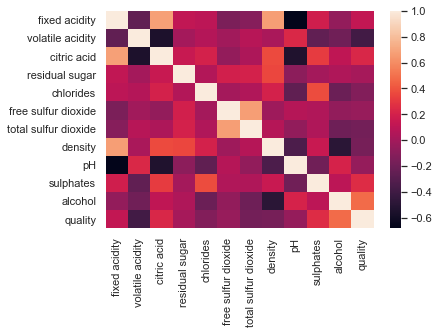

In [71]:
sns.heatmap(df.corr(), data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

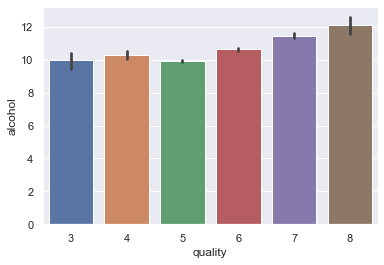

In [72]:
sns.barplot(x = 'quality', y='alcohol', data = df)

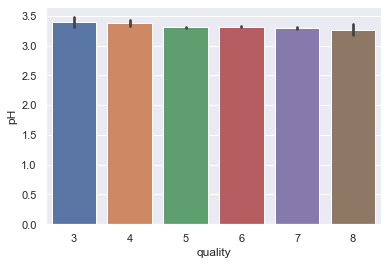

In [73]:
sns.barplot(x = 'quality', y='pH', data = df)
sns.set_theme(context = "notebook")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

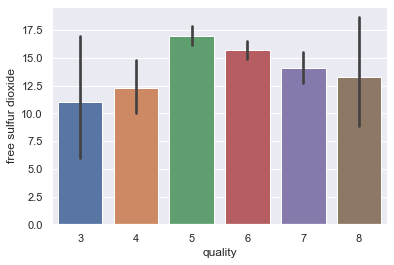

In [74]:
sns.barplot(x = 'quality', y='free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

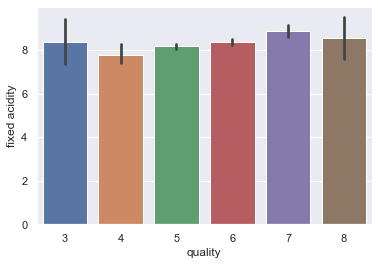

In [75]:
sns.barplot(x = 'quality', y='fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

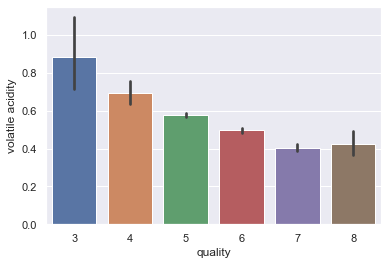

In [76]:
sns.barplot(x = 'quality', y='volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

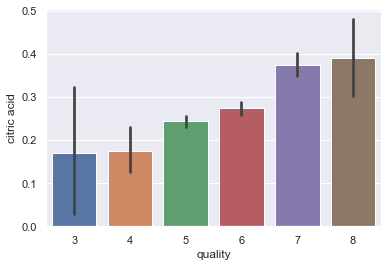

In [77]:
sns.barplot(x = 'quality', y='citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

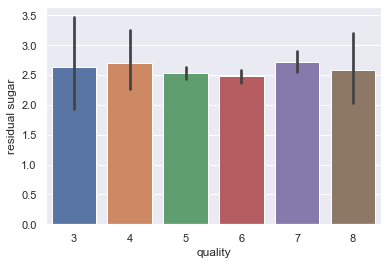

In [78]:
sns.barplot(x = 'quality', y='residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

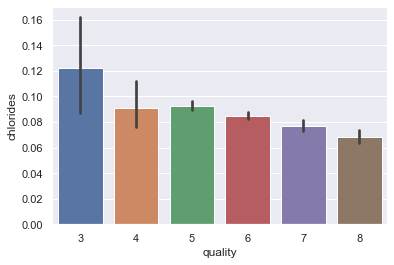

In [79]:
sns.barplot(x = 'quality', y='chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

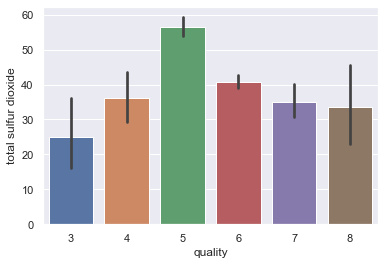

In [80]:
sns.barplot(x = 'quality', y='total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

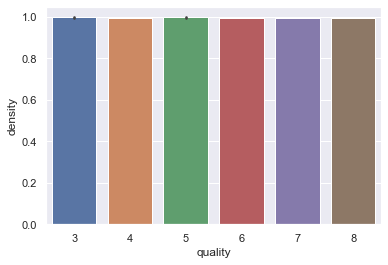

In [81]:
sns.barplot(x = 'quality', y='density', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

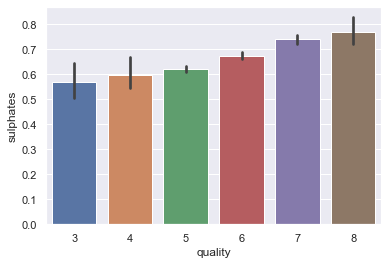

In [82]:
sns.barplot(x = 'quality', y='sulphates', data = df)

In [83]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
#density residual sugar fixed acidity pH

ndf = df.drop(['density', 'residual sugar', 'fixed acidity','pH'], axis = 1)

In [85]:
ndf.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.70,0.00,0.076,11.0,34.0,0.56,9.4,5
1,0.88,0.00,0.098,25.0,67.0,0.68,9.8,5
2,0.76,0.04,0.092,15.0,54.0,0.65,9.8,5
3,0.28,0.56,0.075,17.0,60.0,0.58,9.8,6
4,0.70,0.00,0.076,11.0,34.0,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='count'>

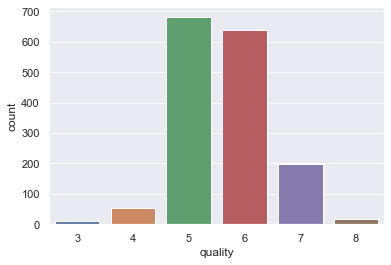

In [86]:
sns.countplot(x = 'quality', data = ndf)

In [87]:
bins = (2, 6.5, 8)
classes = ['bad','good']
ndf['quality'] = pd.cut(ndf['quality'], bins = bins, labels = classes)
label_quality = LabelEncoder()
ndf['quality'] = label_quality.fit_transform(ndf['quality'])
ndf['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [89]:
ndf.head(20)

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.700,0.00,0.076,11.0,34.0,0.56,9.4,0
1,0.880,0.00,0.098,25.0,67.0,0.68,9.8,0
2,0.760,0.04,0.092,15.0,54.0,0.65,9.8,0
3,0.280,0.56,0.075,17.0,60.0,0.58,9.8,0
4,0.700,0.00,0.076,11.0,34.0,0.56,9.4,0
5,0.660,0.00,0.075,13.0,40.0,0.56,9.4,0
6,0.600,0.06,0.069,15.0,59.0,0.46,9.4,0
7,0.650,0.00,0.065,15.0,21.0,0.47,10.0,1
8,0.580,0.02,0.073,9.0,18.0,0.57,9.5,1
9,0.500,0.36,0.071,17.0,102.0,0.80,10.5,0


In [90]:
x = ndf.drop(['quality'], axis=1)
y = ndf['quality']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 3)

In [108]:
model = RandomForestClassifier()

In [109]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [111]:
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy : ', test_data_accuracy)

Accuracy :  0.921875


In [112]:
input_data = (0.650,	0.00,	0.065,	15.0,	21.0,	0.47,	10.0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


C:\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [114]:
pr = pd.DataFrame({'Actual':y_test, 'predicted':X_test_prediction})
pr.head(60)

,Actual,predicted
147,0,0
937,0,0
877,0,0
1000,1,0
73,0,0
31,0,0
266,0,0
1403,1,0
263,0,0
1491,0,0
